# 6-1 객체지향 퍼셉트론 구현:  클래스  

### 1. 함수의 변화 : 고전적 함수
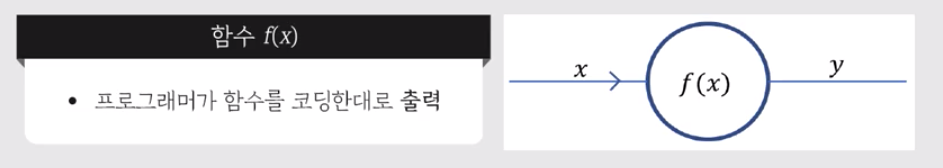

기계학습이 등장하기 전까지, 모든 함수는 프로그래머가 코딩한대로 작성했다.



### 1. 함수의 변화 : 기계학습에서희 함수(학습단계)
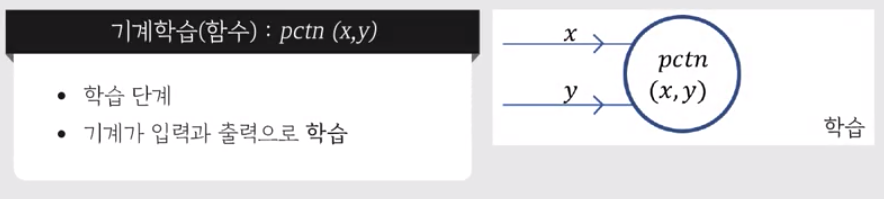

기계학습에서는 입력 값 X와 그에 따른 출력 값 y를 함수에 전달해주면, 함수가 먼저 학습하게 된다.  
출력값을 입력값과 함께 받고 학습을 하게 된다.  
이 단계에서 함수는 학습만 하기 때문에, 출력을 따로 하지는 않는다.  

> 이 도식에 있는 퍼셉트론(pctn)은 단지 하나의 예일 뿐이다.

여기서 중요한 것은 함수를 어떻게 할 것인지  
우리가 고민하지 않고 기계학습이 만들어 낸다는 것이다.  


### 1. 함수의 변화 : 기계학습에서의 함수(예측단계)
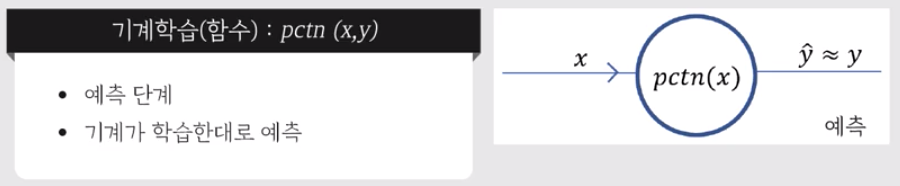

함수가 새로운 입력을 받아, 자기가 배운대로 연산하여 y_hat을 출력한다.  
pctn 함수가 잘 학습되었다면, 출력 y_hat은 y값과 같을 것이다.  
아니면 오차가 발생할 수도 있다.  

### 2. 객체지향 퍼셉트론 : 객체 속성 (인스턴스 변수)
>   퍼셉트론 함수를 객체지향 퍼셉트론으로 전환해보자
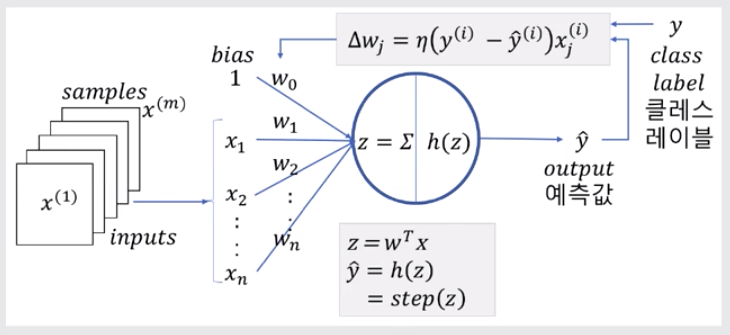

먼저, 퍼셉트론을 객체로 만들어야 한다.  
따라서 객체부터 생각해보면  객체는 속성과 기능으로 구성되어 있다.  
그렇다면, **퍼셉트론의 속성과 기능을 찾아내보자.**  

객체의 속성이란 것은 데이터로 표현되는데  
객체의 속성을 저장하는 변수를 특별히 **인스턴스 변수**라고 한다.

- 입력 (x)
- 출력 (y)
- 순입력 (z)
- 레이블 (y_hat)
- 가중치 (w)
- 학습률 (eta)
- 반복횟수 (epochs)
- 랜덤시드 (random_seed)  

이 중에서 어느것들을 인스턴스 변수로 저장할까?  
가중치, 학습률, 반복횟수, 랜덤시드라 해보자  
그렇다면 x, y, z는 왜 인스턴스 변수로 저장하지 않을까?  
> 다른 값들에 비해 바뀔 가능성이 아주 많기 때문이다.  
> 또는 지역변수(또는 매개변수)로 사용하면 보다 편리하기 때문에 인스턴스 변수로 저장하지 않는다.


### 2. 객체지향 퍼셉트론 : 객체 기능 (메소드)
퍼셉트론의 핵심 기능을 하는 메소드는 무엇이 있을 수 있을까?
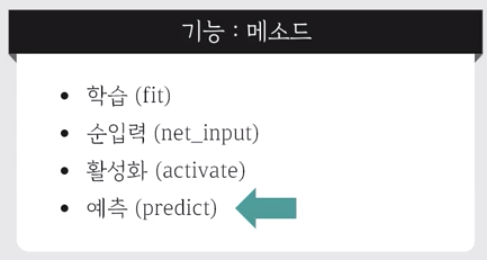


### 3. 객체지향 퍼셉트론 구현 : 클래스 - 이름
클래스 이름은, 대문자로 시작을 권장한다.  
(왜냐하면 다른 함수나 메소드와 구별이 필요할 때가 종종 있기 때문이다.)
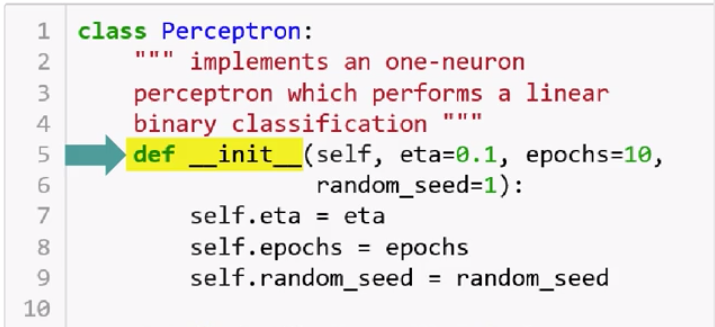
init 메소드는 사실상 객체를 만들기 때문에 생성자라고도 부른다.  
또한 객체가 필요한 속성 데이터를 저장하는 인스턴스 변수들을 초기화한다.

### 3. 객체지향 퍼셉트론 구현 : 클래스 - 학습 메소드
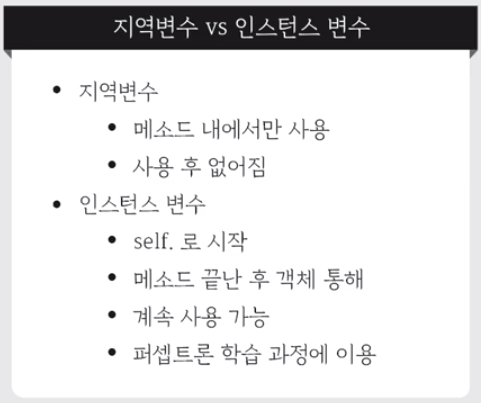

def fit(self, 입력값 X, 클래스 레이블 y, 편향여부 X0=False(편향이 1인지 아닌지)) :

self.w = np.random.random(X.shape[1])  
여기서는 계산의 편의를 위해 1차원 배열을 사용한다.

새로 등장한 변수가 있다.

- cost_
- w_

먼저 인스턴스 변수로 사용하기 위해서  
self.cost_ 라고 사용했고, 리스트 형식으로 초기화했고  
line 18에선, 각각의 반복마다 제대로 분류하지 못한 샘플들의 개수를 self.cost_에 추가하고 있다.  
또한 errors라는 변수는 잘못 분류된 샘플의 수를 카운트하고 있다.  
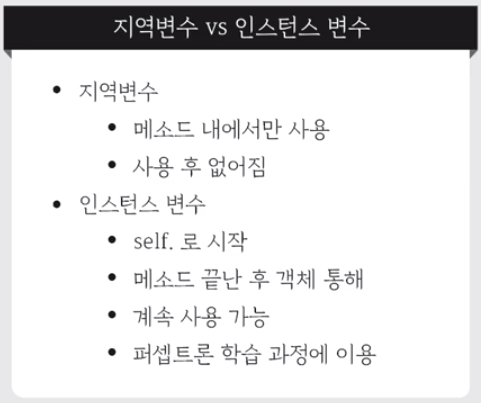

다음 self.w_ 를 살펴보면  
line 9 를 보면, 초기 가중치 w로 초기화 하고,  
line 19에서 에폭이 끝날 때 마다 변화된 새로운 가중치 w를 배열에 추가한다.

그리고 fit method는 자신을 반환한다.  


### 3. 객체지향 퍼셉트론 구현 : 클래스 - 순입력 메소드
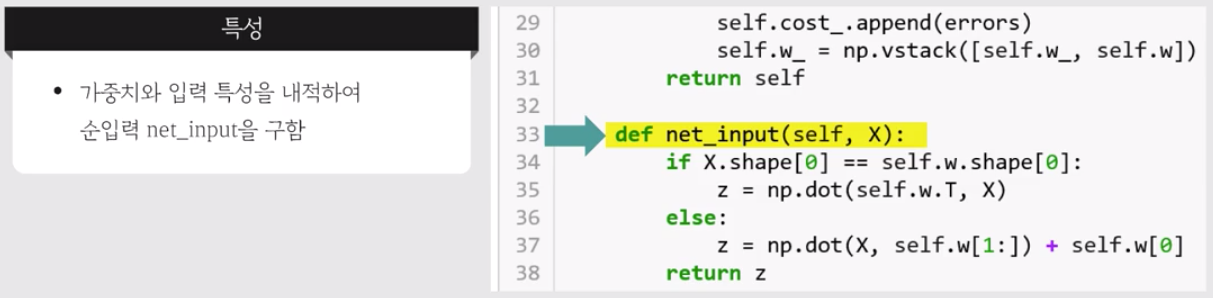

line 34 에서 X와 w의 형상을 비교한 것은 편향값이 1이 아닌 경우를 검사하기 위해서이다.  
이 메소드는 워낙 자주 사용하기 때문에 따로 모듈화를 시켰다.



### 3. 객체지향 퍼셉트론 구현 : 클래스 - 활성화 메소드
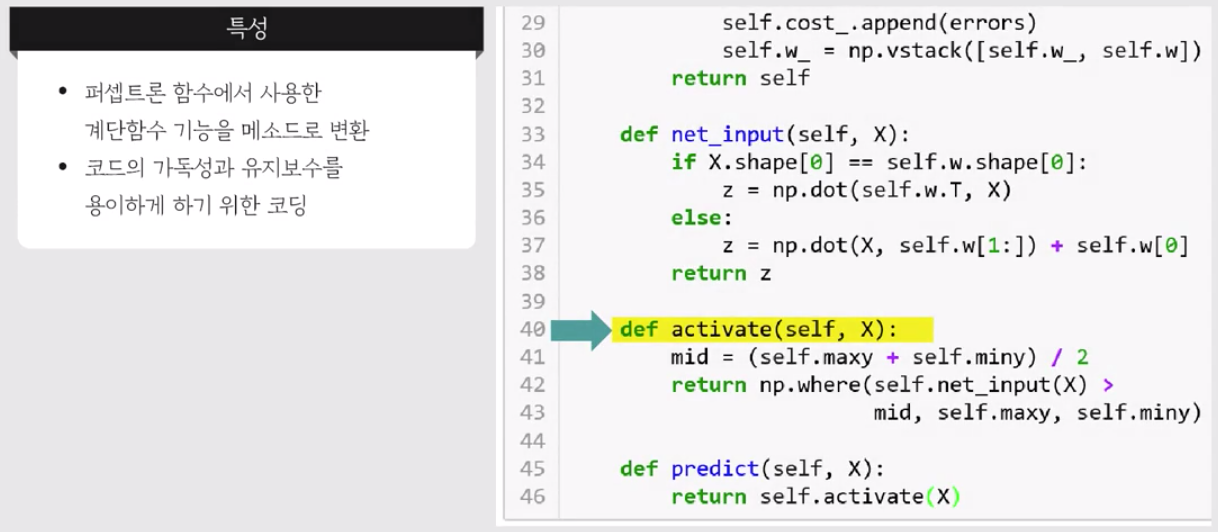
계단함수를 한 줄로 코딩할 수 있음에도 메소드로 따로 만든 것은  
활성화 함수는 종류가 다양한데, 이렇게 따로 만들어 두면 상황에 따라 다른 활성화 함수로 쉽게 바꿀 수 있기 때문이다.


### 3. 객체지향 퍼셉트론 구현 : 클래스 - 예측 메소드
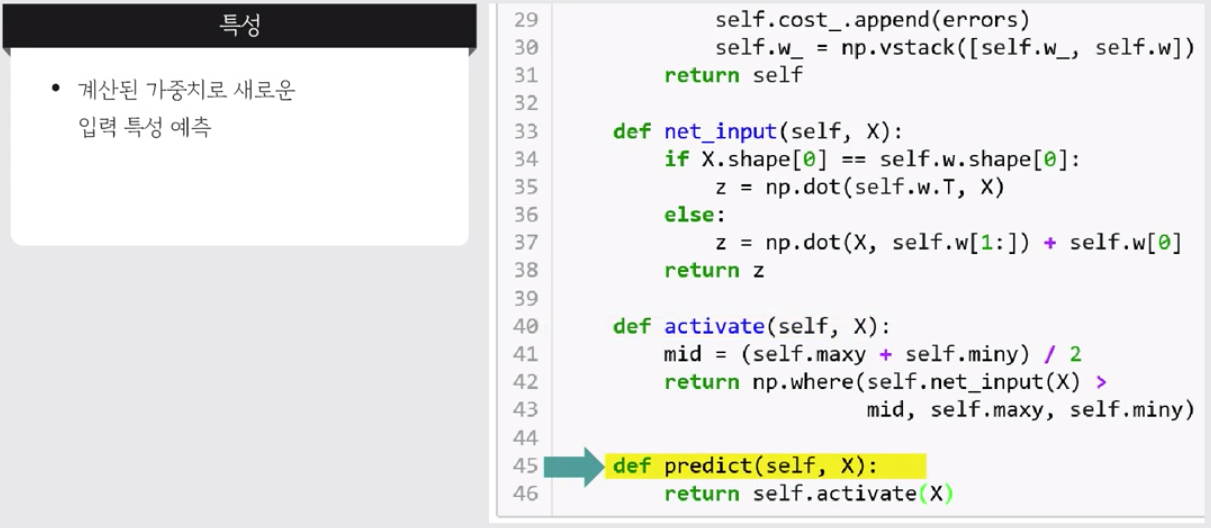

우리가 구현하는 퍼셉트론의 모델에서는 활성화 메소드가 같은 기능을 할 수 있기 때문에,  
활성화 메소드를 호출함으로 예측 메소드를 대체하고 있다.  

같은 기능인데도 predict 메소드를 만드는 이유는  
다른 객체들이 퍼셉트론 객체에도 이런 predict 있을 것을 기대하고 호출하는 경우가 있기 때문이다

In [1]:
# Implementation of Rosenblatt's perceptron algorithm for classification.
# Author: Youngsup KIm, idebtor@gmail.com
# 2018.03.01 - Creation
# 2018.04.18 - works with plot_descision_region(), net_input() modified

import numpy as np

class Perceptron:
    """Perceptron classifier: This implementation of the Perceptron expects 
    binary class labels in {0, 1}.
    
    Parameters
        eta : float (default: 0.1), Learning rate (between 0.0 and 1.0)
        epochs : int (default: 10), Number of passes over the training dataset.
            Prior to each epoch, the dataset is shuffled to prevent cycles.
        random_seed : int, Random state for initializing random weights and shuffling.
        
        X0: If True, then X must have X_0 = 1 in all samples.
                Set it Faslse, if X does not have X_0 
    
    Attributes
        w  : 1d-array, shape={n_features, }, Model weights after fitting. Includes bias
        w_ : 2d-array, shape={epochs, n_features}, Weights in every epoch
        cost_ : list, Number of misclassifications in every epoch.

    """
    def __init__(self, eta = 0.1, epochs = 10, random_seed = 1): # 생성자
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def fit(self, X, y, X0 = False):                             # 학습메소드
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1])
            
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])
            
        for i in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.activate(xi)
                delta = self.eta * (yi - yhat) * xi
                self.w = self.w + delta
                if (yi != yhat): errors += 1
            self.cost_.append(errors)
            self.w_ = np.vstack([self.w_, self.w])
        return self
    
    def net_input(self, X):                                     # 순입력메소드 
        if X.shape[0] == self.w.shape[0]:
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:]) + self.w[0]
        return z
    
    def activate(self, X):                                     # 활성화메소드 
        mid = (self.maxy + self.miny) / 2
        return np.where(self.net_input(X) > mid, self.maxy, self.miny)
    
    def predict(self, X):                                     # 예측메소드
        return self.activate(X)